In [1]:
import pandas as pd
from pandas import DataFrame, Series
#false positive warnings all the time:
pd.options.mode.chained_assignment = None

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import statistics

import os.path


In [2]:
#http://matplotlib.org/1.4.0/users/customizing.html

plt.style.use('ggplot')

mpl.rcParams['font.size'] = 18

### LINES
mpl.rcParams['lines.linewidth'] = '2.0'        # line width in points
mpl.rcParams['lines.marker']    = 'None'
mpl.rcParams['lines.markersize']=  '6'          # markersize, in points

###LEGEND
mpl.rcParams['legend.fontsize']='medium'

### GRIDS
mpl.rcParams['grid.color']='black'     # grid color
mpl.rcParams['grid.linestyle'] =':'    # dotted
mpl.rcParams['grid.linewidth']='0.5'   # in points
mpl.rcParams['grid.alpha']='1.0'       # transparency, between 0.0 and 1.0

### TICKS
mpl.rcParams['xtick.labelsize']="small"  # fontsize of the tick labels
mpl.rcParams['xtick.direction']="out"      # direction: in, out, or inout
mpl.rcParams['ytick.labelsize']="small"   # fontsize of the tick labels
mpl.rcParams['ytick.direction']="out"      # direction: in, out, or inout

### AXES
mpl.rcParams['axes.linewidth']  =  '1.0'    # edge linewidth
mpl.rcParams['axes.grid']       =  'True'   # display grid or not
mpl.rcParams['axes.titlesize']  =  'large'  # fontsize of the axes title
mpl.rcParams['axes.labelsize']  = 'large'  # fontsize of the x any y labels
mpl.rcParams['axes.facecolor']= 'white'     # axes background color

mpl.rcParams['figure.facecolor']= '1.0'     # figure facecolor; 0.75 is scalar gray

In [3]:
def generateFilename(bmtuple):
    fname = './runtime_csv/' +  bmtuple[0] + "_N" + str(bmtuple[1]) + "_" + str(bmtuple[2]) + "_" + bmtuple[3] + "_" + bmtuple[4]
    if len(str(bmtuple[5])) != 0:
        fname = fname + "_" + str(bmtuple[5])
    return fname + "_queryruntimes.csv"

def generateSimulationID(tup):
    identifier = tup[0] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + tup[3] \
            + "_" + tup[4] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra


simulation_map = {
    "Watdiv10M": "W10", "Watdiv100M": "W100", "Watdiv1000M": "W1000", "Ontoforce": "Ont"
}

def generateSimulationIDCompact(tup, pref_length=3):
    #pref_length = 3
    identifier = tup[0][:pref_length] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + simulation_map[tup[3]] \
            + "_" + str(tup[4])[:pref_length] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra

In [4]:
def generateFilenameRuntimesCorrect(bmtuple):
    fname = './runtime_csv_correct/' +  bmtuple[0] + "_N" + str(bmtuple[1]) + "_" + str(bmtuple[2]) + "_" + bmtuple[3] + "_" + bmtuple[4]
    if len(str(bmtuple[5])) != 0:
        fname = fname + "_" + str(bmtuple[5])
    return fname + "_queryruntimes_correct.csv"

In [5]:
tuples_Watdiv10M = [('Blazegraph',1,32,'Watdiv10M','Default',''), \
             ('GraphDB',1,32,'Watdiv10M','Default',''), \
             ('ES',1,32,'Watdiv10M','Default',''), \
             ('Virtuoso',1,32,'Watdiv10M','Default','')]

tuples_Watdiv100M = [('Blazegraph',1,32,'Watdiv100M','Default',''), \
             ('GraphDB',1,32,'Watdiv100M','Default',''), \
             ('ES',1,32,'Watdiv100M','Default',''), \
             ('Virtuoso',1,32,'Watdiv100M','Default','')]

tuples_Watdiv1000M_32 = [('Blazegraph',1,32,'Watdiv1000M','Default',''), \
             ('GraphDB',1,32,'Watdiv1000M','Default',''), \
             ('ES',1,32,'Watdiv1000M','Default',''), \
             ('Virtuoso',1,32,'Watdiv1000M','Default','')]


tuples_Watdiv1000M_64 = [('Blazegraph',1,64,'Watdiv1000M','Default',''), \
             ('GraphDB',1,64,'Watdiv1000M','Default',''), \
             ('ES',1,64,'Watdiv1000M','Default',''), \
             ('Virtuoso',1,64,'Watdiv1000M','Default','')]

tuples_Watdiv1000M_64_Opt = [('Blazegraph',1,64,'Watdiv1000M','Optimized',''), \
             ('GraphDB',1,64,'Watdiv1000M','Optimized',''), \
             ('Virtuoso',1,64,'Watdiv1000M','Optimized','')]

tuples_N3_Watdiv1000M = [('ES',3,32,'Watdiv1000M','Default',''), \
             ('Virtuoso',3,32,'Watdiv1000M','Default','')]

tuples_Other_Watdiv100M = [('Fuseki',1,64,'Watdiv100M','Default',''), \
             ('FluidOps',3,64,'Watdiv100M','Default',''), \
             ('LDF',1,64,'Watdiv100M','Default',''), \
             ('LDF',3,64,'Watdiv100M','Default','')]

tuples_Other_Watdiv1000M = [('Fuseki',1,64,'Watdiv1000M','Default',''), \
             ('FluidOps',1,64,'Watdiv1000M','Default',''), \
             ('FluidOps',3,64,'Watdiv1000M','Default',''), \
             ('LDF',1,64,'Watdiv1000M','Default',''), \
             ('LDF',3,64,'Watdiv1000M','Default','')]


tuples_Ontoforce = [('Blazegraph', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('ES', 1, 64, 'Ontoforce', 'Default', ''), \
              ('GraphDB', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 32,'Ontoforce', 'Optimized', 'VWall'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '0'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '2') \
             ]  





# Query Runtimes per template and template type

* Only data for stress tests
* Pivot tables for template type and template
* Join before taking aggregations => only correct queries!!!

In [6]:
def generate_runtime_comparison_DF(thread_type, bm_tuples):
    interesting_cols = ['query_name', 'thread_type', 'median_runtime']
    df_tot = None

    for bm_tuple in bm_tuples:
        
        filename = generateFilenameRuntimesCorrect(bm_tuple)
        print(filename+ ": " + str(os.path.isfile(filename)))

        df = pd.read_csv(filename, sep='\t')[interesting_cols]
        df = df.rename(columns={'median_runtime': generateSimulationIDCompact(bm_tuple)})
        #print(df.shape)
        
        df = df[df['thread_type'] == thread_type]
        #print(df.shape)

        if df_tot is None:
            df_tot = df
        else:
            df_tot = pd.merge(df_tot, df, how='inner', on=['query_name', 'thread_type'])
            
        #df_tot = df_tot.fillna(timeout)
        
        #print(df_tot.describe())

        
    #df_all = df_tot.drop(['query_name','thread_type'])

    return df_tot




In [19]:
def generate_template_DF(tuples):
    
    df_stress = generate_runtime_comparison_DF('stress', tuples)
    df_stress['template'] = df_stress['query_name'].apply(lambda qn: qn[:2])
    df_stress['template_type'] = df_stress['query_name'].apply(lambda qn: qn[:1])
    cols = [generateSimulationIDCompact(tup) for tup in tuples]
    df_pivot = pd.pivot_table(df_stress, index='template', values=cols, aggfunc='mean')
    return df_pivot[cols]


def generate_templatetype_DF(tuples):
    
    df_stress = generate_runtime_comparison_DF('stress', tuples)
    df_stress['template'] = df_stress['query_name'].apply(lambda qn: qn[:2])
    df_stress['template_type'] = df_stress['query_name'].apply(lambda qn: qn[:1])
    cols = [generateSimulationIDCompact(tup) for tup in tuples]
    df_pivot = pd.pivot_table(df_stress, index='template_type', values=cols, aggfunc='mean')
    return df_pivot[cols]

In [20]:
tuples = tuples_Watdiv1000M_64_Opt[:2] + tuples_Watdiv1000M_64[2:3] + tuples_Watdiv1000M_64_Opt[2:] + tuples_Other_Watdiv1000M[3:4]
print(tuples)
df_templates = generate_template_DF(tuples)
df_templates

[('Blazegraph', 1, 64, 'Watdiv1000M', 'Optimized', ''), ('GraphDB', 1, 64, 'Watdiv1000M', 'Optimized', ''), ('ES', 1, 64, 'Watdiv1000M', 'Default', ''), ('Virtuoso', 1, 64, 'Watdiv1000M', 'Optimized', ''), ('LDF', 1, 64, 'Watdiv1000M', 'Default', '')]
./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/LDF_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True


,Bla_N1_64_W1000_Opt,Gra_N1_64_W1000_Opt,ES_N1_64_W1000_Def,Vir_N1_64_W1000_Opt,LDF_N1_64_W1000_Def
template,,,,,
C1,4.940516,41.336715,300.000000,50.035636,300.000000
C2,17.761844,25.493369,300.000000,10.203031,300.000000
F1,0.670688,0.625516,9.861268,0.071896,300.000000
F2,0.664716,1.836255,138.434201,4.051152,266.996652
F3,0.988516,3.994012,285.952252,3.760456,278.236529
F4,1.205160,20.921219,291.791630,2.744209,300.000000
F5,0.070181,0.064602,2.427156,0.019544,6.277677
L1,0.036493,0.008071,1.487417,0.006973,2.943234
L2,2.324181,3.226320,24.471601,0.357609,300.000000


In [21]:
df_templatetypes = generate_templatetype_DF(tuples)
df_templatetypes

./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/LDF_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True


,Bla_N1_64_W1000_Opt,Gra_N1_64_W1000_Opt,ES_N1_64_W1000_Def,Vir_N1_64_W1000_Opt,LDF_N1_64_W1000_Def
template_type,,,,,
C,11.351180,33.415042,300.000000,30.119333,300.000000
F,0.719852,5.488321,145.693301,2.129451,230.302172
L,1.129471,3.571551,40.578727,0.288724,181.020213
S,0.716312,1.137674,62.536523,0.671059,206.013166


# Plots

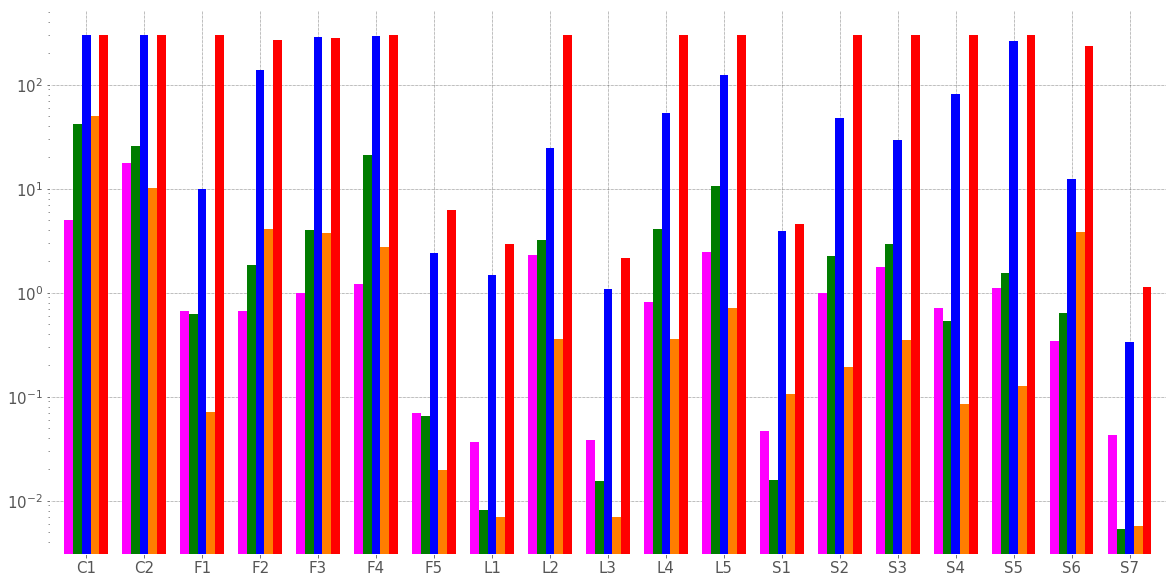

In [22]:
df_templates.plot(kind='bar', figsize=(20,10), logy=True, legend=False, rot=0, width=0.75,\
                  color=['#FF00FF', '#007D00', '#0000FF', '#FF7D00', '#FF0000'])
plt.xlabel("")

fname= './img/templates/WatdivTemplates'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=400)

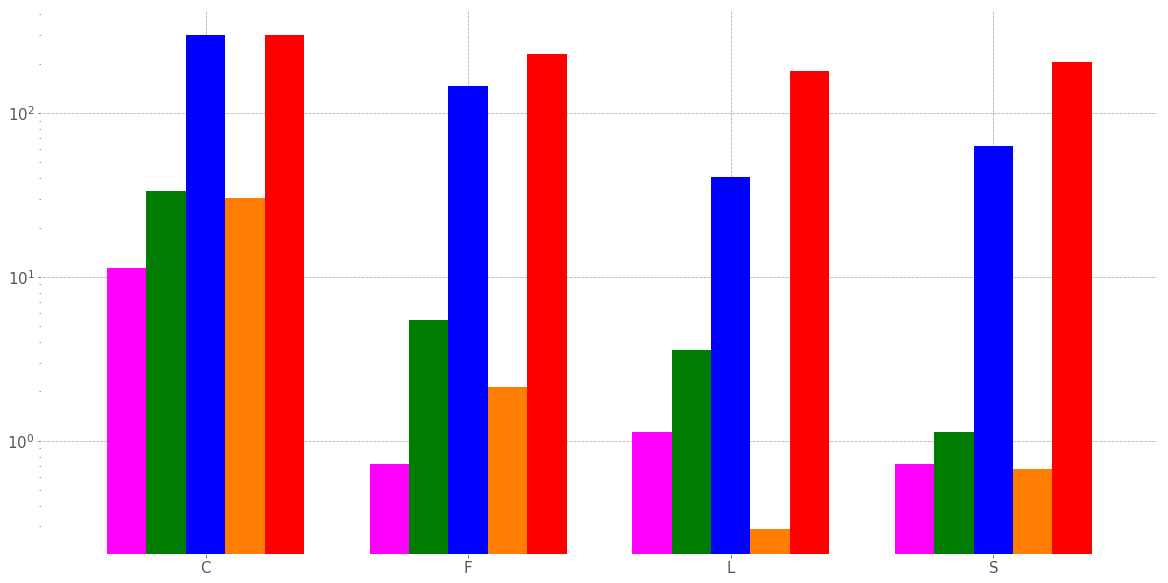

In [23]:
df_templatetypes.plot(kind='bar', figsize=(20,10), logy=True, legend=False, rot=0, width=0.75,\
                  color=['#FF00FF', '#007D00', '#0000FF', '#FF7D00', '#FF0000'])
plt.xlabel("")
fname= './img/templates/WatdivTemplateTypes'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=400)

# Vertical Scaling versus Templates

In [27]:
tuples = tuples_Watdiv1000M_32 + tuples_Watdiv1000M_64 +  tuples_Watdiv1000M_64_Opt[:2] + tuples_Watdiv1000M_64_Opt[2:] + tuples_Other_Watdiv1000M[3:4]
print(tuples)
df_templates = generate_template_DF(tuples)
df_templates

[('Blazegraph', 1, 32, 'Watdiv1000M', 'Default', ''), ('GraphDB', 1, 32, 'Watdiv1000M', 'Default', ''), ('ES', 1, 32, 'Watdiv1000M', 'Default', ''), ('Virtuoso', 1, 32, 'Watdiv1000M', 'Default', ''), ('Blazegraph', 1, 64, 'Watdiv1000M', 'Default', ''), ('GraphDB', 1, 64, 'Watdiv1000M', 'Default', ''), ('ES', 1, 64, 'Watdiv1000M', 'Default', ''), ('Virtuoso', 1, 64, 'Watdiv1000M', 'Default', ''), ('Blazegraph', 1, 64, 'Watdiv1000M', 'Optimized', ''), ('GraphDB', 1, 64, 'Watdiv1000M', 'Optimized', ''), ('Virtuoso', 1, 64, 'Watdiv1000M', 'Optimized', ''), ('LDF', 1, 64, 'Watdiv1000M', 'Default', '')]
./runtime_csv_correct/Blazegraph_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Blazegraph_N1_64_Watdi

,Bla_N1_32_W1000_Def,Gra_N1_32_W1000_Def,ES_N1_32_W1000_Def,Vir_N1_32_W1000_Def,Bla_N1_64_W1000_Def,Gra_N1_64_W1000_Def,ES_N1_64_W1000_Def,Vir_N1_64_W1000_Def,Bla_N1_64_W1000_Opt,Gra_N1_64_W1000_Opt,Vir_N1_64_W1000_Opt,LDF_N1_64_W1000_Def
template,,,,,,,,,,,,
C1,23.418070,273.952255,300.000000,58.004748,15.765230,118.392073,300.000000,1.453932,4.830544,40.371675,50.579587,300.000000
F1,6.530368,84.692390,13.217319,0.099155,2.384112,65.563985,7.930563,0.069813,0.629277,0.599936,0.062058,300.000000
F2,36.069112,20.064841,300.000000,8.999186,1.981851,52.618717,21.136148,3.922497,0.363285,1.605177,4.631251,300.000000
F3,69.268985,73.480100,300.000000,0.833533,4.929080,44.024571,300.000000,0.912085,1.267072,1.890217,4.958099,300.000000
F5,2.793507,24.668312,5.303449,0.021965,0.135823,61.221940,2.073554,0.012511,0.065824,0.045940,0.015946,6.704233
L1,0.473417,35.441301,4.259753,0.008828,0.108433,79.211427,1.557295,0.005747,0.047087,0.008236,0.006392,2.996254
L3,0.636296,48.987717,4.405702,0.010386,0.035170,0.581654,1.057386,0.006172,0.028578,0.006700,0.006701,0.589267
L4,214.315205,35.390355,130.900746,0.464939,3.164335,58.153841,52.451773,0.296049,0.753538,5.802715,0.321284,300.000000
L5,300.000000,67.126971,240.949643,0.902425,15.166073,1.311853,134.071913,1.054224,3.422098,18.714263,1.039869,300.000000


## CAREFUL: C3 is not excluded, make 1 big frame first!!

In [30]:
tuples = [tuples_Watdiv1000M_32[0], tuples_Watdiv1000M_64[0],  tuples_Watdiv1000M_64_Opt[0]]
print(tuples)
df_templates = generate_template_DF(tuples)
df_templates

[('Blazegraph', 1, 32, 'Watdiv1000M', 'Default', ''), ('Blazegraph', 1, 64, 'Watdiv1000M', 'Default', ''), ('Blazegraph', 1, 64, 'Watdiv1000M', 'Optimized', '')]
./runtime_csv_correct/Blazegraph_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True


,Bla_N1_32_W1000_Def,Bla_N1_64_W1000_Def,Bla_N1_64_W1000_Opt
template,,,
C1,48.025041,15.020999,4.940516
C2,134.296714,54.303533,17.761844
C3,300.000000,300.000000,257.390899
F1,4.968749,2.357383,0.670688
F2,21.147863,2.790198,0.664716
F3,64.952490,3.701816,0.988516
F4,55.661596,4.680570,1.205160
F5,2.729174,0.137714,0.070181
L1,0.558136,0.450987,0.036493


In [31]:
df_templatetypes = generate_templatetype_DF(tuples)
df_templatetypes

./runtime_csv_correct/Blazegraph_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True


,Bla_N1_32_W1000_Def,Bla_N1_64_W1000_Def,Bla_N1_64_W1000_Opt
template_type,,,
C,160.773919,123.108178,93.364420
F,29.891974,2.733536,0.719852
L,108.320877,5.051275,1.129471
S,25.337065,2.834989,0.716312


## BIG FRAME

In [61]:
tuplesBla = [tuples_Watdiv1000M_32[0], tuples_Watdiv1000M_64[0],  tuples_Watdiv1000M_64_Opt[0]]
tuplesES = [tuples_Watdiv1000M_32[2], tuples_Watdiv1000M_64[2]]
tuplesGra = [tuples_Watdiv1000M_32[1], tuples_Watdiv1000M_64[1],  tuples_Watdiv1000M_64_Opt[1]]
tuplesVir = [tuples_Watdiv1000M_32[3], tuples_Watdiv1000M_64[3],  tuples_Watdiv1000M_64_Opt[2]]


In [62]:
tuples = tuplesBla + tuplesES + tuplesGra + tuplesVir

In [59]:
def get_cols_store(store, df):
    pref_length = len(store)
    return [col for col in df.columns if col[:pref_length] == store]

./runtime_csv_correct/Blazegraph_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True


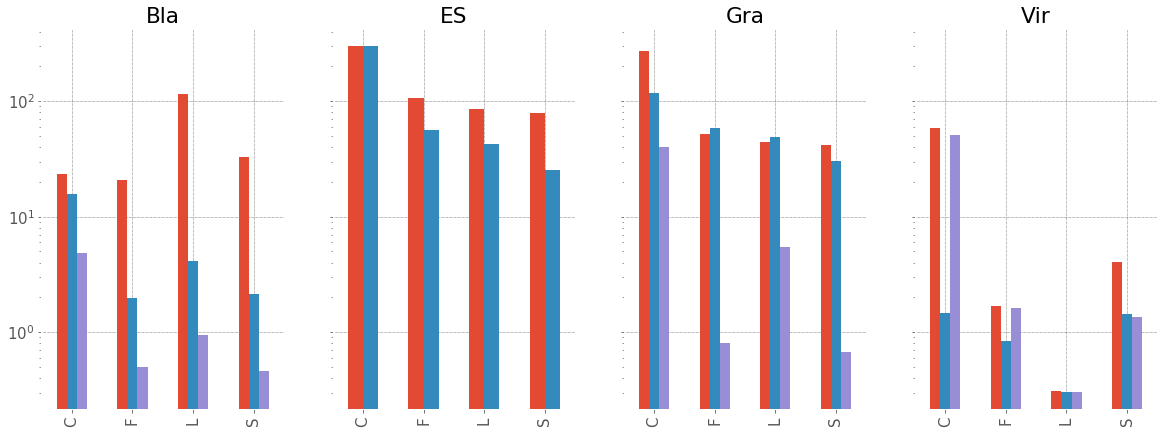

In [71]:
fig, ax = plt.subplots(1,4, figsize=(20,7), sharey=True)
df_templatetypes = generate_templatetype_DF(tuples)


cols = get_cols_store('Bla', df_templatetypes)
df_templatetypes[cols].plot(kind='bar', legend=None, style='o--', logy=True, ax=ax[0], title='Bla', )
ax[0].set_xlabel("")

cols = get_cols_store('ES', df_templatetypes)
df_templatetypes[cols].plot(kind='bar', legend=None, style='o--', logy=True, ax=ax[1], title='ES')
ax[1].set_xlabel("")

cols = get_cols_store('Gra', df_templatetypes)
df_templatetypes[cols].plot(kind='bar', legend=None, style='o--', logy=True, ax=ax[2], title='Gra')
ax[2].set_xlabel("")

cols = get_cols_store('Vir', df_templatetypes)
df_templatetypes[cols].plot(kind='bar', legend=None, style='o--', logy=True, ax=ax[3], title='Vir')
ax[3].set_xlabel("")

fname= './img/runtimeTemplates/runtimeTemplates'
fig.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=400)
fig.savefig(fname+'.eps', format='eps', bbox_inches='tight', dpi=200)   
fig.savefig(fname+'.pdf', format='pdf', bbox_inches='tight', dpi=1200)        


In [54]:
df_templatetypes.columns 

    
    
    

[]